In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
sys.path.append('./../../designer/script/')
sys.path.append('./../')
sys.path.append('./../../')
from film import TwoMaterialFilm
from spectrum import Spectrum
from design import BaseDesign
import os

from analyze_utils.structure import plot_layer_thickness
from optimizer.adam import AdamThicknessOptimizer
import pickle


/tmp/ipykernel_95335/3045758232.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('viridis')


[200. 100. 200. 100. 200. 100. 200. 100. 200. 100. 200. 100. 200. 100.
 300. 150. 300. 150. 300. 150. 300. 150. 300. 150. 300. 150. 300. 150.
 350. 175. 350. 175. 350. 175. 350. 175. 350. 175. 350. 175. 350. 175.]


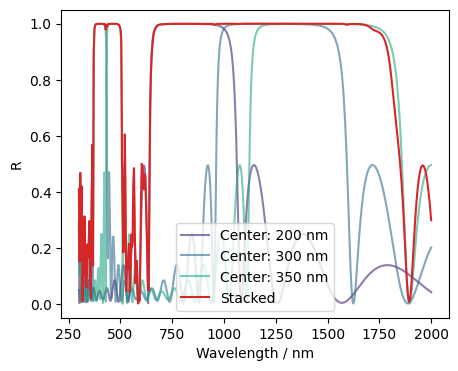

In [33]:
import matplotlib
cmap = matplotlib.cm.get_cmap('viridis')


def make_bragg(d):
    modulated_bragg = TwoMaterialFilm('1', '2', 'SiO2', d, incidence='Air')
    modulated_bragg.add_spec_param(0., wls)
    return modulated_bragg

wls = np.linspace(300, 2000, 500)
layer = 7

fig, ax = plt.subplots(1, 1)
ls = [200, 300, 350]
for i, l in enumerate(ls):
    
    d = np.array([l, 0.5 * l] * layer)
    ax.plot(wls, make_bragg(d).get_spec().get_R(), label=f'Centered at {l} nm', color=cmap(i / 4 + 0.1), alpha=0.6, ls='-')

d = np.array([[l, 0.5 * l] * layer for l in ls]).flatten()
print(d)
ax.plot(wls, make_bragg(d).get_spec().get_R(), label="Stacked MLTF", color='C3')
ax.set_xlabel('Wavelength / nm')
ax.set_ylabel('R')
ax.legend(loc='lower center')

fig.set_size_inches(5, 4)
fig.savefig('./../examples_thesis/images/bragg/modulated.pdf', bbox_inches='tight')

C:\Users\rfeng6\AppData\Local\Temp\ipykernel_24800\2483977373.py:30: RuntimeWarning: invalid value encountered in arcsin
  img[i, :] = get_ang_spec(wl, np.arcsin(k * wl) * 180. / np.pi, film)


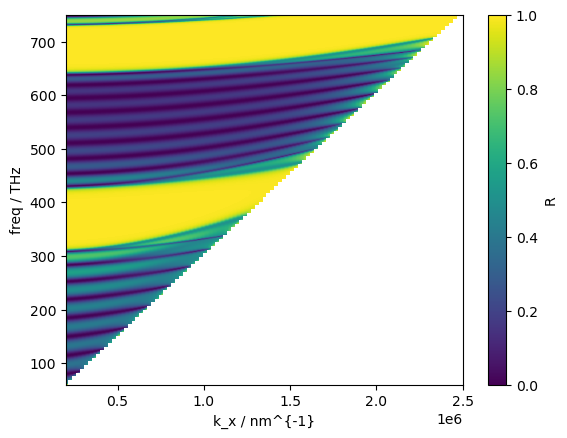

In [ ]:
from tmm.get_spectrum_angs import get_spectrum_simple as get_spectrum_angs_

def get_ang_spec(wl, angs, film: TwoMaterialFilm):
    spectrum = np.empty(angs.shape[0] * 2, dtype='float')
    same_wls = np.zeros(angs.shape[0]) + wl

    get_spectrum_angs_(
        spectrum, 
        wl, 
        film.get_d(), 
        film.calculate_n_array(same_wls), 
        film.calculate_n_sub(same_wls), 
        film.calculate_n_inc(same_wls), 
        angs
    )

    return spectrum[:angs.shape[0]]


def plot_band(film: TwoMaterialFilm):
    wl_min, wl_max = 400, 5000

    wls = np.linspace(1 / wl_max, 1 / wl_min, 500)
    wls = 1 / wls # even spacing w.r.t. freq.
    k = np.linspace(1 / wl_max, 1 / wl_min, 100)
    img = np.empty((wls.shape[0], k.shape[0]))

    for i, wl in enumerate(wls):
        
        img[i, :] = get_ang_spec(wl, np.arcsin(k * wl) * 180. / np.pi, film)

    fig, ax = plt.subplots(1, 1)
    s = ax.imshow(
        img, 
        extent=[1e9 * k[0], 1e9 * k[-1], 3e5 / wls[0], 3e5 / wls[-1]], 
        aspect='auto', 
        origin='lower', 
        vmin=0, 
        vmax=1, 
        interpolation=None
    )
    cbar = fig.colorbar(s)
    cbar.set_label('R')

    ax.set_xlabel('k_x / nm^{-1}')
    ax.set_ylabel('freq / THz')

    # ax.plot([k[0], k[-1]], [], label='n = 1')


def make_bragg(d):
    modulated_bragg = TwoMaterialFilm('TiO2', 'SiO2', '1', d, incidence='1') # seems that the incident material needs to have lower n for band gap to open
    modulated_bragg.add_spec_param(0., wls)
    return modulated_bragg

d = np.array([100, 100] * 10)
plot_band(make_bragg(d))
    
        